# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
max_t = 1000
for t in range(max_t):
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.036999999172985555


### 4. Algorithm

In this notebook, the agents were trained using the DDPG algorithm as described in [this paper](https://arxiv.org/abs/1509.02971). Details of the implementation are as follows:

* **Neural network architectures**  

    The Actor(policy) network architecture is a multilayer perceptron (MLP) network with 2 hidden layers. The 1st hidden layer had 400 hidden units and the 2nd hidden layer had 300 hidden units. Relu was used as activation function after each hidden layer. The final output layer used a tanh layer to bound the actions.

    The Critic(value) network architecture is also a multilayer perceptron (MLP) network with 2 hidden layers. The 1st hidden layer had 400 hidden units. Then, actions vector were concatenated with the output of the 1st hidden layer to feed into the 2nd hidden layer. The 2nd hidden layer had 300 hidden units. Relu was used as activation function after each hidden layer. The final output layer has a single unit.

    The final layer weights of both the actor and critic network were initialized from a uniform distribution [-3e-3, 3e-3]. This was to ensure the initial outputs for the policy and value estimates were near zero. The other layers were initialized from uniform distributions [-1/sqrt(f), 1/sqrt(f)], where f is the number of input units of the layer.  


* **Hyperparameter**
    * Experience replay buffer size = 1e5
    * Minibatch size = 128
    * Discount factor = 0.99
    * Soft update parameter $\tau$ = 1e-3              
    * Actor learning rate = 1e-4         
    * Critic learning rate = 1e-3         
    * L2 weight decay rate = 0         
    * Update the networks 10 times for every 20 timesteps  
    
    
* **Methods to improve training stability**
    - **use gradient clipping**  
    Gradient clipping was applied to the critic network during training as follows:
    ```
    critic_loss.backward()
    torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
    self.critic_optimizer.step()
    ```
    - **update networks infrequently**  
    To stablize training, both actor and critic networks were updated after 20 timesteps instead of every timestep.

### 5. Experiments and results

In [6]:
# Instantiate the Environment and Agent
from ddpg_multiagent import Agent

agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, seed=0)
env_info = env.reset(train_mode=True)[brain_name]

### 5a.Train the Agent with DDPG

Episode 100	Average Score: 9.51	Time lapsed: 15.0min
Episode 200	Average Score: 33.02	Time lapsed: 29.5min
Episode 225	Average Score: 35.04	Time lapsed: 33.2min
Environment solved in 125 episodes!	Average Score: 35.04


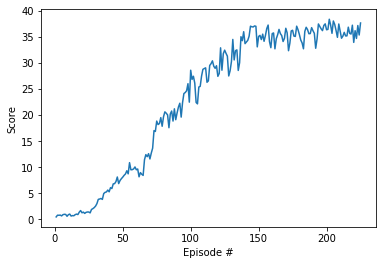

In [7]:
import torch
import numpy as np
from time import time
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

def ddpg(n_episodes=2000, max_t=1000, print_every=100):
    """DDPG
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): print scores every 'print_every' episodes
    """
    mean_scores = []                        # list containing mean scores from each episode
    mean_scores_window = deque(maxlen=100)  # last 100 scores
    t1 = time()
    for i_episode in range(1, n_episodes+1):
        agent.reset()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations 
        scores = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations   # get the next states
            rewards = env_info.rewards                   # get the rewards
            dones = env_info.local_done 
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards
            if all(dones):
                break 
        mean_scores_window.append(np.mean(scores))       # save most recent scores
        mean_scores.append(np.mean(scores))              # save most recent scores
        t2 = (time()-t1)/60
        print('\rEpisode {}\tAverage Score: {:.2f}\tTime lapsed: {:.1f}min'.format(i_episode, np.mean(mean_scores_window), t2), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tTime lapsed: {:.1f}min'.format(i_episode, np.mean(mean_scores_window), t2))
        if np.mean(mean_scores_window)>=35:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(mean_scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_gpu.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_gpu.pth')
            break
    return mean_scores

mean_scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(mean_scores)+1), mean_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

###  5b. Evaluate the trained Agent

In [8]:
# load the weights from file
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_gpu.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_gpu.pth'))

# play 5 episodes by the ddpg trained agent
for i in range(5):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    states = env_info.vector_observations            # get the current state
    scores = np.zeros(num_agents)                   # initialize the score
    max_t = 1000
    for t in range(max_t):
        actions = agent.act(states)                      # select actions
        env_info = env.step(actions)[brain_name]        # send the actions to the environment
        next_states = env_info.vector_observations   # get the next states
        rewards = env_info.rewards                   # get the rewards
        dones = env_info.local_done                  # see if episodes have finished
        scores += rewards                                # update the scores
        states = next_states                             # roll over the states to next time step
        if all(dones):                                       # exit loop if all episodes finished
            break
    print("Episode: {}\tMean score: {}".format(i, np.mean(scores)))

Episode: 0	Mean score: 37.39299916420132
Episode: 1	Mean score: 37.430999163351956
Episode: 2	Mean score: 38.147999147325756
Episode: 3	Mean score: 36.81999917700887
Episode: 4	Mean score: 37.28299916666001


### 5c. Watch the intelligent Agent play
As can be seen in the movie clip below, the intelligent agents were able to follow the moving targets (rotating green ball) most of the time without losing contact.

![SegmentLocal](reacher.gif "segment")

### 6. Conclusion  

In this project, we solved the reacher environment in 125 episodes. The training agents got average scores of above 35 in 100 consecutive episodes. To evaluate the trained model, we loaded new agents with network weights from the saved model. The reloaded agents were able to achieve average scores of ~37.3, well above the benchmark score of 30 in all of the first 5 episodes. 

### 7. Close the environment

In [10]:
env.close()

### 8. Future work
1. In this work, the hyperparameters for network initialization, learning rates, soft update parameter etc. were directly borrowed from the [DDPG paper](https://arxiv.org/abs/1509.02971). Fine-tuning those parameters specifically for this environments might boost the agents performance further.
2. Batch normalization technique was not used in the current implementation of the actor or critic networks. According to the [DDPG paper](https://arxiv.org/abs/1509.02971), batch normalization can minimize covariance shift and therefore stablize training. Adding batch normalization layers to the actor or critic networks may be beneficial to the networks' performance.
3. DQN algorithm is known to tend to over-estimate state-action value functions. Using double Q-learning algorithm as the estimator of state-action value functions (the critic) may provide more accurate value function estimates and stablize learning. 